# Classify Points
you are provided with two features and you have to classify it in class 1 or 0.
<html>
    <div style="width:100%">
        <div style="width:150px;height:150px;margin:auto">
            <img src="https://image.flaticon.com/icons/svg/1256/1256638.svg" >
        </div>
    </div>
</html>


Data Description
Two files are provided to you train and test.

`Train`: It consist of two files Xtrain containing the features and Ytrain containing labels associated with them.

`Test`: It also consists of two files Xtest which contains the features on which your model will be tested and sample output which defines the format in which your output needs to be submitted.


### Please draw the graph for the given data before training the model.
Before submitting please check the list below:
1.The column names or headers of submission file must match with that given in sample submission file.
2.Datatype of the columns of submission file must match with that of the given sample_submission file.
3.The number of rows must be equal to given test cases and number of columns must be equal to the columns given in the sample submission file.

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_test=pd.read_csv("Logistic_X_Test.csv").values
x_train=pd.read_csv("Logistic_X_Train.csv").values
y_train=pd.read_csv("Logistic_Y_Train.csv").values

In [4]:
x_test

array([[-0.79982686, -0.00383313],
       [-0.75778472,  1.03137038],
       [ 1.03680832, -0.35700409],
       ...,
       [ 0.91472363,  0.51784857],
       [-0.81326194,  0.65111488],
       [-0.54779714,  0.15991242]])

In [5]:
x_train.shape

(2250, 2)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(2,)))
model.add(Dense(128,activation="relu",input_shape=(2,)))
model.add(Dense(1,activation="sigmoid"))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
hist=model.fit(x_train,y_train,batch_size=32,epochs=65,validation_split=0.2)

Train on 1800 samples, validate on 450 samples
Epoch 1/65
1800/1800 [==============================] - 1s 408us/step - loss: 0.5001 - accuracy: 0.7928 - val_loss: 0.3167 - val_accuracy: 0.8800
Epoch 2/65
1800/1800 [==============================] - 0s 93us/step - loss: 0.3002 - accuracy: 0.8672 - val_loss: 0.2550 - val_accuracy: 0.8911
Epoch 3/65
1800/1800 [==============================] - 0s 81us/step - loss: 0.2740 - accuracy: 0.8761 - val_loss: 0.2334 - val_accuracy: 0.9022
Epoch 4/65
1800/1800 [==============================] - 0s 68us/step - loss: 0.2536 - accuracy: 0.8878 - val_loss: 0.2177 - val_accuracy: 0.9111
Epoch 5/65
1800/1800 [==============================] - 0s 65us/step - loss: 0.2326 - accuracy: 0.9006 - val_loss: 0.1838 - val_accuracy: 0.9244
Epoch 6/65
1800/1800 [==============================] - 0s 71us/step - loss: 0.1930 - accuracy: 0.9233 - val_loss: 0.1636 - val_accuracy: 0.9400
Epoch 7/65
1800/1800 [==============================] - 0s 69us/step - loss: 0.161

Epoch 57/65
1800/1800 [==============================] - 0s 76us/step - loss: 0.0901 - accuracy: 0.9683 - val_loss: 0.0836 - val_accuracy: 0.9711
Epoch 58/65
1800/1800 [==============================] - 0s 68us/step - loss: 0.0919 - accuracy: 0.9633 - val_loss: 0.0821 - val_accuracy: 0.9689
Epoch 59/65
1800/1800 [==============================] - 0s 74us/step - loss: 0.0923 - accuracy: 0.9678 - val_loss: 0.0796 - val_accuracy: 0.9711
Epoch 60/65
1800/1800 [==============================] - 0s 82us/step - loss: 0.0911 - accuracy: 0.9683 - val_loss: 0.0862 - val_accuracy: 0.9711
Epoch 61/65
1800/1800 [==============================] - 0s 66us/step - loss: 0.0893 - accuracy: 0.9667 - val_loss: 0.0792 - val_accuracy: 0.9733
Epoch 62/65
1800/1800 [==============================] - 0s 70us/step - loss: 0.0925 - accuracy: 0.9678 - val_loss: 0.0828 - val_accuracy: 0.9711
Epoch 63/65
1800/1800 [==============================] - 0s 76us/step - loss: 0.0927 - accuracy: 0.9644 - val_loss: 0.0847 -

In [11]:
import matplotlib.pyplot as plt

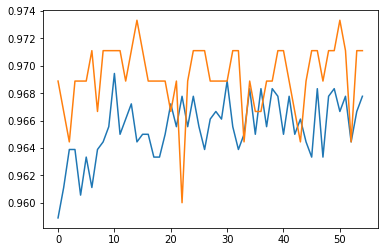

In [12]:
plt.plot(hist.history["accuracy"][10:])
plt.plot(hist.history["val_accuracy"][10:])

In [13]:
y_pred=model.predict_classes(x_test)

In [14]:
pd.DataFrame(y_pred,columns=["label"]).to_csv("y_pred.csv",index=False) 